# **Ciência de Dados - Métodos de Predição e Erros.**


**prof: Sérgio Assunção Monteiro, D.Sc**

**linkedin:** https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

**lattes:** http://lattes.cnpq.br/9489191035734025

# **Regressão Linear**

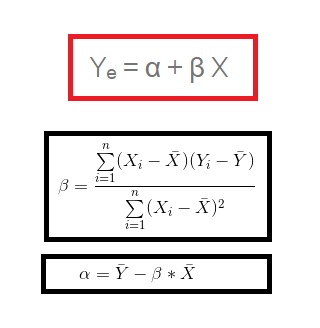

**exemplo 01**

In [207]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)

In [208]:
qamostras     = 100
media         = 1.87
desvio_padrao = 0.43

X = media * np.random.randn(qamostras) + desvio_padrao   

In [209]:
ruido_02 = 1.56
res = 0.5 * np.random.randn(100)       # Geração de 100 termos residenciais
y = 3.2 + 0.563 * X + res                  # Geração de Valores de Y (Randômicos)

In [210]:
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

df.head()

,X,y
0,3.728778,6.240877
1,1.178294,3.189500
2,2.260240,3.837273
3,4.620470,6.286023
4,3.922333,4.821712


In [211]:
# Calcular média de X e y
xmedia = np.mean(X)
ymedia = np.mean(y)

# Calcular os termos necessários para numerador e denominador de beta
df['xycov'] = (df['X'] - xmedia) * (df['y'] - ymedia)
df['xvar'] = (df['X'] - xmedia)**2

# Calcular beta e alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymedia - (beta * xmedia)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 3.2243892894714588
beta = 0.5936680303599948


In [212]:
ypred = lambda alpha, beta, X: alpha + beta * X

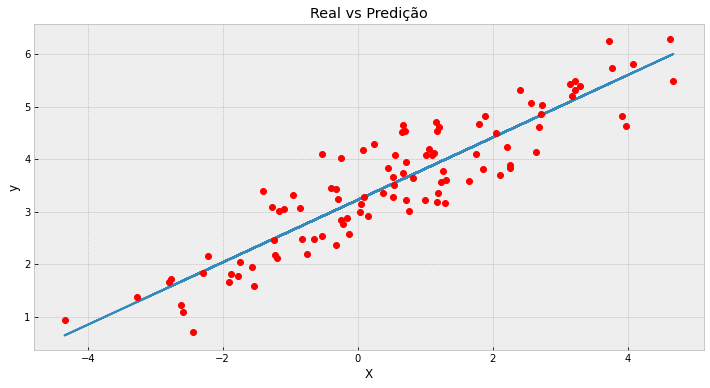

In [213]:
plt.figure(figsize=(12, 6))
plt.plot(X, ypred(alpha, beta, X))   # regressão linear
plt.plot(X, y, 'ro')                 # gráfico scatter
plt.title('Real vs Predição')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

**exemplo 02**

*   https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

*   https://www.statsmodels.org/dev/regression.html


In [214]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [215]:
np.random.seed(9876789)

In [216]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [217]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [218]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Fri, 21 Oct 2022   Prob (F-statistic):          2.83e-239
Time:                        14:17:04   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [219]:
print("Parâmetros: ", results.params)
print("R2: ", results.rsquared)

Parâmetros:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


In [220]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [221]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           6.30e-27
Time:                        14:17:04   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [222]:
print("Parâmetros: ", res.params)
print("Erros padrões: ", res.bse)
print("Valores previstos (preditos): ", res.predict())

Parâmetros:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Erros padrões:  [0.02640602 0.10380518 0.00231847 0.17121765]
Valores previstos (preditos):  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


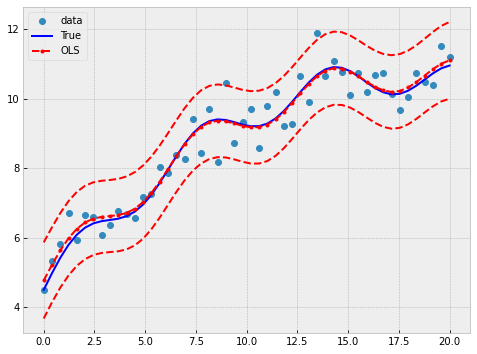

In [223]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

**Exemplo 03**

In [224]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
X = 1.7 * np.random.randn(100) + 1.3   # média = 1.7, desvio-padrão = 1.3
res = 0.5 * np.random.randn(100)       # Geração de 100 termos residenciais
y = 3.2 + 0.563 * X + res                  # Geração de Valores de Y (Randômicos)

df = pd.DataFrame(
    {'X': X,
     'y': y}
)


y = df['y'].values.reshape(-1, 1)
X = df['X'].values.reshape(-1, 1)
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [225]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [3.19372126]
betas = [[0.59673483]]


In [226]:
df.head()

,X,y
0,4.298889,6.561850
1,1.980267,3.641011
2,2.963855,4.233408
3,5.109518,6.561357
4,4.474849,5.132778


In [227]:
df['X'].head()

0    4.298889
1    1.980267
2    2.963855
3    5.109518
4    4.474849
Name: X, dtype: float64

In [228]:
y_pred=model.predict(X)

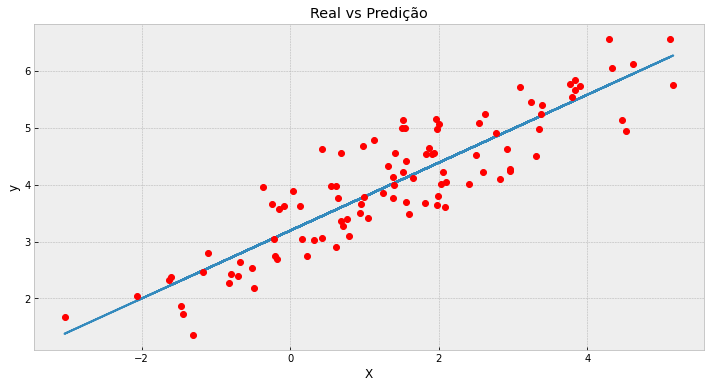

In [229]:
plt.figure(figsize=(12, 6))
plt.plot(X, y_pred)   # regressão linear
plt.plot(X, y, 'ro')                 # gráfico scatter
plt.title('Real vs Predição')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [230]:
new_X = [[6]]
print(model.predict(new_X))

[[6.77413026]]


# **Regressão Polinomial**

**Exemplo**

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [232]:
def gerar_dados_p01():
  x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22] #data
  y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
  return x, y

def f_regressao_polinomial(x, y):
  modelo = np.poly1d(np.polyfit(x, y, 3))
  return modelo

In [233]:
x, y = gerar_dados_p01()

modelo = f_regressao_polinomial(x, y)

linha = np.linspace(1, 22, 100)

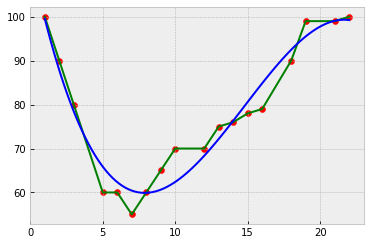

Erro de aproximação: 0.9432150416451025


In [234]:
plt.scatter(x, y, color='red')
plt.plot(x, y, color='green')
plt.plot(linha, modelo(linha), color='blue')
plt.show()
erro=r2_score(y, modelo(x))
print('Erro de aproximação: {}'.format(erro))

# **Medição de Erros**

**Dados Reais vs Preditos**

In [235]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


In [236]:
n=100
periodo = np.arange(n)
#seguindo a distribuição normal
y_teste = np.random.standard_normal(n) 
#perturbação de y_teste
y_pred = y_teste +0.5*np.random.standard_normal(n)

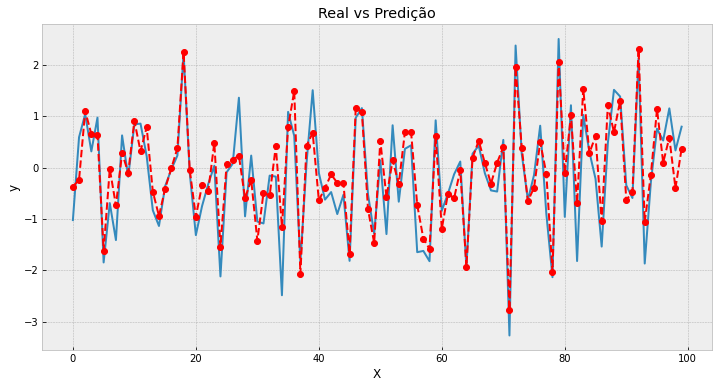

In [237]:
plt.figure(figsize=(12, 6))
plt.plot(periodo, y_pred)
plt.plot(periodo, y_teste, 'ro--')
plt.title('Real vs Predição')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

**MAE (Mean Absolute Error)**

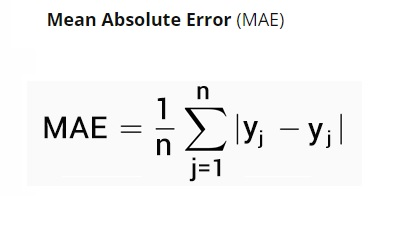

**Exemplo**

In [238]:
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred))  

MAE: 0.3832783177427976


**MSE (Mean Squared Error)**

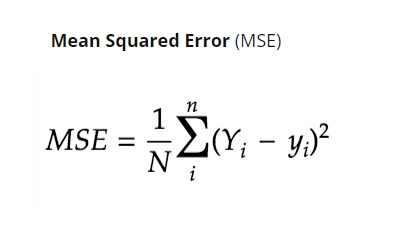

**Exemplo**

In [239]:
print('MSE:', metrics.mean_squared_error(y_teste, y_pred))  

MSE: 0.22560747020184038


**RMSE (Root Mean Squared Error)**

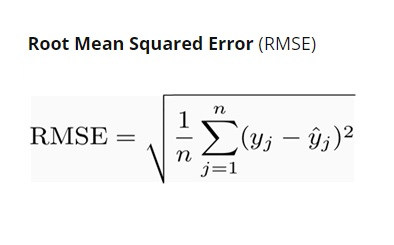

**Exemplo**

In [240]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

RMSE: 0.4749815472224583


# **Predição**

**Importar Pacotes**

In [241]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [242]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 
import requests

In [244]:
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [245]:
codigos = df_nomes_tickers['CÓDIGO']
codigo_especifico = codigos[1]
print(codigo_especifico)
codigo = [str(codigo_especifico+'.SA')]
print(codigo)

ABUD34
['ABUD34.SA']


In [246]:
df = yf.download(codigo[0], 
                 start='2021-08-01', 
                 end='2021-12-01',
                 group_by="ticker"); # ";" serve para não exibir os dados

[*********************100%***********************]  1 of 1 completed


In [247]:
df.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02 00:00:00-03:00,54.500000,54.500000,53.950001,53.950001,53.474136,165
2021-08-03 00:00:00-03:00,53.950001,54.599998,53.939999,54.250000,53.771488,1289
2021-08-04 00:00:00-03:00,54.099998,54.099998,53.290001,53.290001,52.819958,223
2021-08-05 00:00:00-03:00,53.150002,53.750000,52.900002,53.650002,53.176785,110
2021-08-06 00:00:00-03:00,54.910000,54.910000,53.700001,53.849998,53.375015,567
2021-08-09 00:00:00-03:00,53.500000,53.549999,53.299999,53.299999,52.829868,185


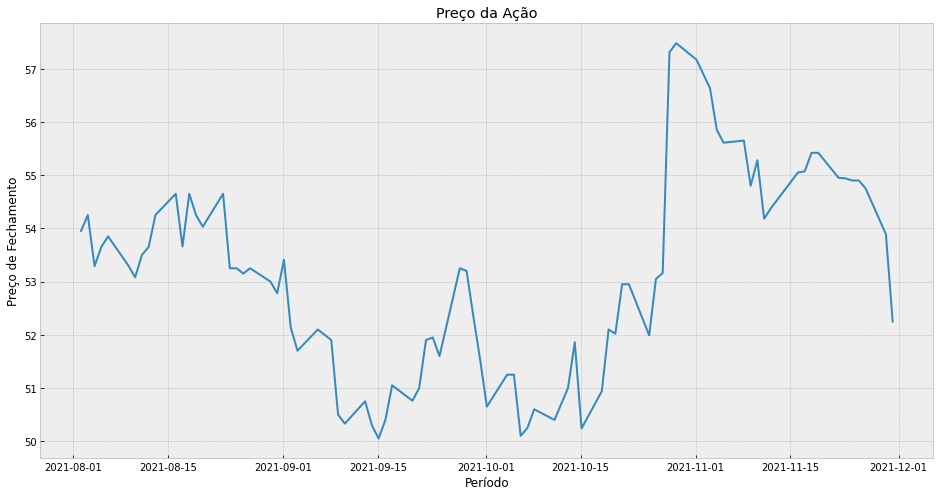

In [248]:
plt.figure(figsize=(16, 8))
plt.title("Preço da Ação")
plt.xlabel("Período")
plt.ylabel("Preço de Fechamento")
plt.plot(df['Close'])
plt.show()

In [249]:
df = df[["Close"]]
df.head()

,Close
Date,
2021-08-02 00:00:00-03:00,53.950001
2021-08-03 00:00:00-03:00,54.250000
2021-08-04 00:00:00-03:00,53.290001
2021-08-05 00:00:00-03:00,53.650002
2021-08-06 00:00:00-03:00,53.849998


In [250]:
df.head()

,Close
Date,
2021-08-02 00:00:00-03:00,53.950001
2021-08-03 00:00:00-03:00,54.250000
2021-08-04 00:00:00-03:00,53.290001
2021-08-05 00:00:00-03:00,53.650002
2021-08-06 00:00:00-03:00,53.849998


In [251]:
df.shape

(83, 1)

In [252]:
dias_futuros = 30
df["Predicao"] = df["Close"].shift(-dias_futuros)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,Predicao
Date,,
2021-08-02 00:00:00-03:00,53.950001,50.299999
2021-08-03 00:00:00-03:00,54.250000,50.049999
2021-08-04 00:00:00-03:00,53.290001,50.400002
2021-08-05 00:00:00-03:00,53.650002,51.049999
2021-08-06 00:00:00-03:00,53.849998,50.759998


In [253]:
X = np.array(df.drop(["Predicao"], 1))[:-dias_futuros]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [254]:
X

array([[53.95000076],
       [54.25      ],
       [53.29000092],
       [53.65000153],
       [53.84999847],
       [53.29999924],
       [53.08000183],
       [53.5       ],
       [53.65000153],
       [54.25      ],
       [54.65000153],
       [53.65999985],
       [54.65000153],
       [54.25      ],
       [54.02999878],
       [54.65000153],
       [53.25      ],
       [53.25      ],
       [53.15000153],
       [53.25      ],
       [53.        ],
       [52.77999878],
       [53.40999985],
       [52.13999939],
       [51.70000076],
       [52.09999847],
       [51.90000153],
       [50.5       ],
       [50.33000183],
       [50.75      ],
       [50.29999924],
       [50.04999924],
       [50.40000153],
       [51.04999924],
       [50.75999832],
       [51.        ],
       [51.90000153],
       [51.95000076],
       [51.59999847],
       [53.25      ],
       [53.20000076],
       [52.34999847],
       [51.54000092],
       [50.65000153],
       [51.25      ],
       [51

In [255]:
y = np.array(df["Predicao"])[:-dias_futuros]

In [256]:
x_treino, x_test ,y_treino, y_test = train_test_split(X, y, test_size = 0.25)

In [257]:
model = LinearRegression().fit(x_treino, y_treino)

In [258]:
x_futuro = df.drop(["Predicao"], 1)[:-dias_futuros]
x_futuro = x_futuro.tail(dias_futuros)
x_futuro = np.array(x_futuro)
x_futuro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[52.13999939],
       [51.70000076],
       [52.09999847],
       [51.90000153],
       [50.5       ],
       [50.33000183],
       [50.75      ],
       [50.29999924],
       [50.04999924],
       [50.40000153],
       [51.04999924],
       [50.75999832],
       [51.        ],
       [51.90000153],
       [51.95000076],
       [51.59999847],
       [53.25      ],
       [53.20000076],
       [52.34999847],
       [51.54000092],
       [50.65000153],
       [51.25      ],
       [51.25      ],
       [50.09999847],
       [50.25      ],
       [50.59999847],
       [50.40000153],
       [51.        ],
       [51.86000061],
       [50.24000168]])

In [259]:
predicao = model.predict(x_futuro)
predicoes = predicao
valido = df[X.shape[0]:]

In [260]:
valido["Predicoes"] = predicoes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


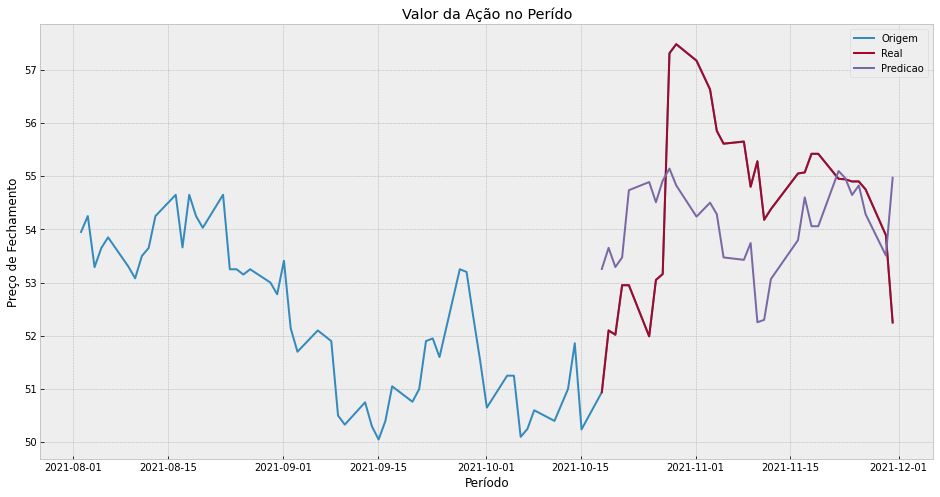

In [261]:
plt.figure(figsize = (16, 8))
plt.title("Valor da Ação no Perído")
plt.xlabel("Período")
plt.ylabel("Preço de Fechamento")
plt.plot(df["Close"])
plt.plot(valido[["Close", "Predicoes"]])
plt.legend(["Origem", "Real", "Predicao"])